In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import PassiveAggressiveRegressor,LinearRegression 

## Load Datasets

In [22]:
instagramData = pd.read_csv("D:\DML\instagram datasets\Instagram data.csv", encoding='latin-1')
instagramData.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [23]:
instagramData.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [24]:
instagramData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Analyzing Instagram Reach

C:\Users\orion\AppData\Local\Temp\ipykernel_10852\3186580937.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




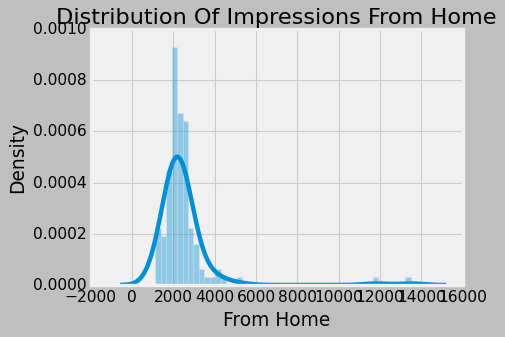

In [25]:
plt.figure(figsize=(6,4))
plt.style.use('fivethirtyeight')
plt.title("Distribution Of Impressions From Home")
sns.distplot(instagramData["From Home"])
plt.show()

C:\Users\orion\AppData\Local\Temp\ipykernel_10852\3446838585.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




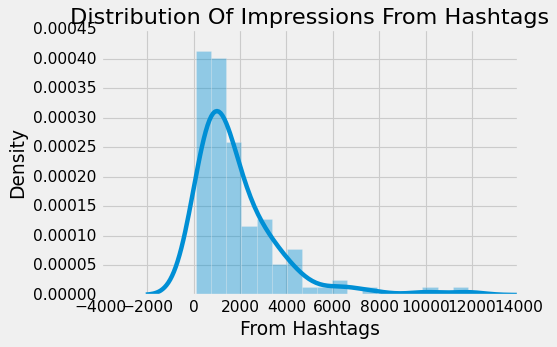

In [26]:
plt.figure(figsize=(6,4))
plt.style.use('fivethirtyeight')
plt.title("Distribution Of Impressions From Hashtags")
sns.distplot(instagramData["From Hashtags"])
plt.show()

C:\Users\orion\AppData\Local\Temp\ipykernel_10852\4105817136.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




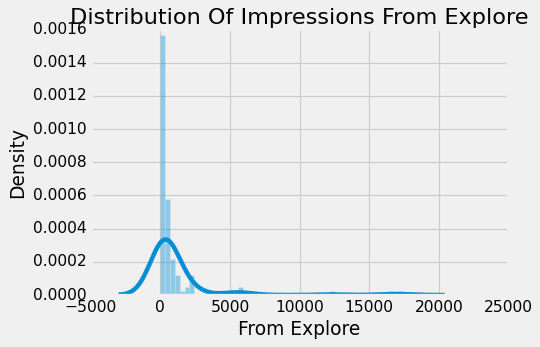

In [27]:
plt.figure(figsize=(6,4))
plt.title("Distribution Of Impressions From Explore")
sns.distplot(instagramData["From Explore"])
plt.show()

In [28]:
## Percentage Impressions From Various Sources On Instagram
home = instagramData["From Home"].sum()
hashtags = instagramData["From Hashtags"].sum()
explore = instagramData["From Explore"].sum()
other =  instagramData["From Other"].sum()

labels = ["From Home","From Hashtags","From Explore","From Other"]
values = [home,hashtags,explore,other]
fig = px.pie(instagramData, values=values,names=labels, title="Impressions On Instagram Posts From Various Sources")
fig.show()

## Analyzing Content of Instagram Posts

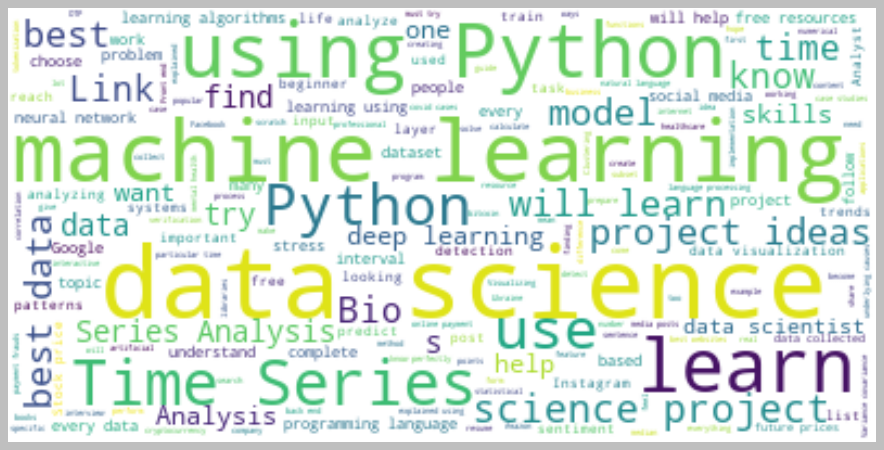

In [29]:
## Wordcloud of the caption
text = " ".join(i for i in instagramData["Caption"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(14,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

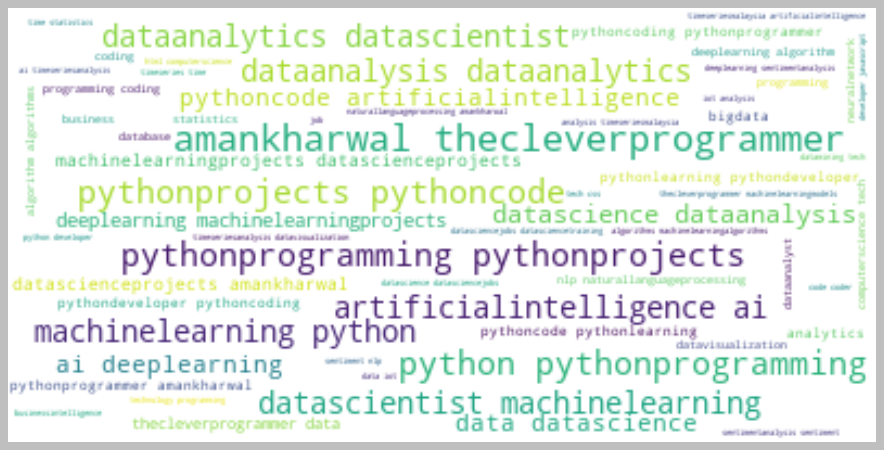

In [30]:
text = " ".join(i for i in instagramData["Hashtags"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(14,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships

In [31]:
figure = px.scatter(data_frame= instagramData, x = "Impressions", y = "Likes",size="Likes", trendline="ols", title="Relationship Between Impressions And Likes")
figure.show()

In [32]:
figure = px.scatter(data_frame= instagramData, x = "Impressions", y = "Comments",size="Comments", trendline="ols", title="Relationship Between Impressions And Comments")
figure.show()

In [33]:
figure = px.scatter(data_frame= instagramData, x = "Impressions", y = "Shares",size="Shares", trendline="ols", title="Relationship Between Impressions And Shares")
figure.show()

In [34]:
figure = px.scatter(data_frame= instagramData, x = "Impressions", y = "Saves",size="Saves", trendline="ols", title="Relationship Between Impressions And Saves")
figure.show()

## Instagram Reach Model

In [35]:
x = np.array(instagramData[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]])
y = np.array(instagramData["Impressions"])

Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [37]:
## Model for linear regression
model1 = LinearRegression()
model1.fit(Xtrain,ytrain)
accuracy = model1.score(Xtest,ytest)
print("Accuracy = ",accuracy)

Accuracy =  0.8777977785012779


In [38]:
## Model for PassiveAggressiveRegressor
model2 = PassiveAggressiveRegressor()
model2.fit(Xtrain,ytrain)
accuracy = model2.score(Xtest,ytest)
print("Accuracy = ",accuracy)

Accuracy =  0.9363480052405805


In [39]:
# Features = [['Likes','Saves','Comments','Shares','Profile Visits','Follows']]
features = np.array([[284,265,8,9,170,60]])
model2.predict(features)

array([11932.87784024])